In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
excelFile = pd.ExcelFile(r"Cardiac_Outcomes.xlsx")
HosDis = pd.read_excel(excelFile, 'Hospitalization_Discharge')
CardiacComp = pd.read_excel(excelFile, 'CardiacComplications')
Respons = pd.read_excel(excelFile, 'Responsivenes')
PaHi = pd.read_excel(excelFile, 'PatientHistory')
Labs = pd.read_excel(excelFile, 'Labs')
Demog = pd.read_excel(excelFile, 'Demography')
PatPre = pd.read_excel(excelFile, 'Patient_Precriptions')

65. Which Admission Ward has maximum number of visits scheduled    

In [4]:
#result = HosDis.groupby('admission_ward')['inpatient_number'].nunique()
#print(result.head(1))

print('Admission Ward that has maximum number of visits:')
(HosDis.groupby('admission_ward')['inpatient_number'].agg(['nunique'])).head(1)

Admission Ward that has maximum number of visits:


,nunique
admission_ward,
Cardiology,1547


66. Display total count of patients in each discharge_department based on gender

In [5]:
# Merge Hospitalization_Discharge and Demography
dfNew = HosDis.merge(Demog[['inpatient_number','gender']], on ='inpatient_number')

print('Total count of patients in each discharge_department based on gender')
#dfNew.groupby(['discharge_department', 'gender'])['inpatient_number'].agg(['nunique'])
dfNew.groupby(['gender', 'discharge_department'])['inpatient_number'].agg(['nunique'])


Total count of patients in each discharge_department based on gender


nunique
gender discharge_department         
Female Cardiology                993
       GeneralWard               137
       ICU                         5
       Others                     28
Male   Cardiology                710
       GeneralWard               104
       ICU                         7
       Others                     24

67. How many Unique patients were precribed each type of medication?

In [6]:
# Using 'Patient_Precriptions' sheet and Unique 'inpatient_number'
print('Unique patients Count by Prescribed medication:')
PatPre.groupby('Drug_name')['inpatient_number'].agg(['nunique'])

Unique patients Count by Prescribed medication:


,nunique
Drug_name,
Aspirin enteric-coated tablet,958
Atorvastatin calcium tablet,822
Benazepril hydrochloride tablet,434
Clopidogrel Hydrogen Sulphate tablet,401
Deslanoside injection,1017
Digoxin tablet,999
Dobutamine hydrochloride injection,22
Enoxaparin Sodium injection,113
Furosemide injection,1720


68. Find 5 patients with the highest Discharge days greater than 20 List their most common outcome

In [103]:
# (HosDis.loc[(HosDis['dischargeDay'] >20)]).head(5)
high_discharge_days_df = (HosDis.loc[:, ['inpatient_number','dischargeDay','outcome_during_hospitalization']]).sort_values('dischargeDay' , ascending=False)

print(' Top 5 patients with the highest Discharge days :')
(high_discharge_days_df.loc[(HosDis['dischargeDay'] >20)]).head(5)


 Top 5 patients with the highest Discharge days :


,inpatient_number,dischargeDay,outcome_during_hospitalization
884,794077,123,Alive
1613,768711,118,Alive
1548,791880,88,Alive
1573,794784,82,Alive
1513,757711,76,Alive


69. Get the list of patient ID's which are not there in prescriptions but in demographics

In [69]:
# Merge of Demography & Patient_Precriptions dataframes and using indicator= true and '_merge' column to find only left df rows that is not present in right df 

df_dem=pd.merge(Demog,PatPre,on=['inpatient_number'],how="outer",indicator=True)
df_dem=df_dem[df_dem['_merge']=='left_only']

df_dem_pts = pd. DataFrame() 
df_dem_pts['Patient ID'] = df_dem['inpatient_number']

# Create a styled representation of the DataFrame without index
styled_df_dem = df_dem_pts.style.hide()

# Print the styled DataFrame

print('Note: In Data there is only 1 Patient ID which is not there in prescriptions but in demographics: ')
print()
print('List of Patient IDs which are not there in prescriptions but in demographics: ')
styled_df_dem 

Note: In Data there is only 1 Patient ID which is not there in prescriptions but in demographics: 

List of Patient IDs which are not there in prescriptions but in demographics: 


Patient ID
789308


70. On average, what is the most frequent weekday of admission?

In [78]:
# Coverting Addmission Date from DateFormat to Days

date_df = pd. DataFrame() 

date_df['Patients'] = HosDis['inpatient_number']
date_df['add_date'] = pd.to_datetime(HosDis['Admission_date']) 
date_df['DayOfWeek'] = date_df['add_date'].dt.day_name() 

#date_df.groupby('dayOfWeek').agg(['count'])

# Calculating distint count of patients admmited by Days and Sorting in decending order

addmission_days = date_df.groupby('DayOfWeek')['Patients'].nunique().reset_index()
addmission_days_sorted = addmission_days.sort_values(by='Patients',  ascending=False).reset_index()

# Getting most frequent weekday of admission

Most_frequent_weekday_of_Addmission = addmission_days_sorted.iloc[0]['DayOfWeek']
No_of_patients_admitted =  addmission_days_sorted.iloc[0]['Patients']
print(' Most frequent weekday of admission : '+ Most_frequent_weekday_of_Addmission)
print(' No of patients admitted : ' +  str(No_of_patients_admitted))


 Most frequent weekday of admission : Monday
 No of patients admitted : 308


71. Which year had the maximum admissions

In [82]:
# Coverting Addmission Date from DateFormat to Year

date_df_new = pd. DataFrame() 
date_df_new['Patients'] = HosDis['inpatient_number']
date_df_new['adm_date'] = pd.to_datetime(HosDis['Admission_date']) 
date_df_new['adm_year'] = pd.DatetimeIndex(date_df_new['adm_date']).year

# Calculating distint count of patients admmited by Year and Sorting in decending order

admit_years = date_df_new.groupby('adm_year')['Patients'].nunique().reset_index()
admit_years_sorted = admit_years.sort_values(by='Patients',  ascending=False).reset_index()

# Getting Year with maximum number of admissions.

year_with_maximum_admisions = admit_years_sorted.iloc[0]['adm_year']
No_of_patients_admitted_year =  admit_years_sorted.iloc[0]['Patients']
print(' Year with Maximum Admissions : '+ str(year_with_maximum_admisions))
print(' No of patients Admitted : ' +  str(No_of_patients_admitted_year))

#date_df_new.groupby('adm_year').agg(['count'])

 Year with Maximum Admissions : 2016
 No of patients Admitted : 518


72. What % of the dataset is male vs female?

In [31]:
#Demog.groupby('gender')['inpatient_number'].nunique().reset_index()

gendre_df = pd. DataFrame() 
gendre_df = Demog.groupby('gender')['inpatient_number'].nunique().reset_index()

gendre_df['Percent %'] = round((gendre_df['inpatient_number'] /
                        gendre_df['inpatient_number'].sum()) * 100 , 2)

gendre_df.rename(columns={'inpatient_number':'Patients Count'},inplace= True) 

gendre_df


,gender,Patients Count,Percent %
0,Female,1163,57.92
1,Male,845,42.08


73. Which patient in the youngest age category weighs the most?

In [33]:
# Fiding the Youngest age Patients 
rslt_df = Demog[Demog['ageCat'] == '21-29'] 
#print('\nResult dataframe :\n', rslt_df)

# Sorting the resultset in decending order and Finding the Heighest Weight Patient
Sorted_rs = rslt_df.sort_values(by='weight',  ascending=False).reset_index()
young_pt = Sorted_rs.iloc[0]['inpatient_number']
yount_pt_wt = Sorted_rs.iloc[0]['weight']

print('Patient in youngest category(21-29) with Highest weight is : ' +  str(young_pt))
print('Weight is : ' +  str(yount_pt_wt))

#maxWeight = rslt_df['weight'].max()
#print(maxWeight)


Patient in youngest category(21-29) with Highest weight is : 831184
Weight is : 82.5


74. Which adm ward had the lowest rate of Outcome Death?

In [30]:
# Percentage calculation function

def calc_percent(num1, total):
    return (num1/total)*100

# Filtering Patients having Outcome "Dead".
pt_outcome_death_df = HosDis[HosDis['outcome_during_hospitalization'] == 'Dead']

total_no_of_pt_dead = len(pt_outcome_death_df)

# Using GroupBy to Group patients by Admit ward and then sorting to find the adm ward with lowest rate of Outcome Death

adm_out_pt_df = pt_outcome_death_df.groupby('admission_ward')['inpatient_number'].nunique().reset_index()

adm_out_pt_df['Rate of Death % '] = round(calc_percent(adm_out_pt_df['inpatient_number'],total_no_of_pt_dead ), 2)

adm_out_pt_df_sorted = adm_out_pt_df.sort_values(by='inpatient_number',  ascending=True).reset_index()

adm_out_pt_df_sorted.rename(columns={'inpatient_number':'Patients Count'},inplace= True) 

print('After Analysing the Data, 3 Admission ward had lowest rate of Outcome Death.')
adm_out_pt_df_sorted

After Analysing the Data, 3 Admission ward had lowest rate of Outcome Death.


,index,admission_ward,Patients Count,Rate of Death %
0,1,GeneralWard,1,9.09
1,2,ICU,1,9.09
2,3,Others,1,9.09
3,0,Cardiology,8,72.73


75. What % of those with an outcome of death, had myocardial infarction?

In [22]:
# Filtering Patients having Outcome "Dead".
pt_outcome_death_df = HosDis[HosDis['outcome_during_hospitalization'] == 'Dead']
total_pt_outcome_death = len(pt_outcome_death_df)

# Filter patients having Mayocardial Infarction and Outcome of Death
cardiac_death_pt1 = pt_outcome_death_df.merge(CardiacComp[['inpatient_number', 'myocardial_infarction']], on ='inpatient_number')
cardiac_death_pt1_filtered = cardiac_death_pt1[cardiac_death_pt1['myocardial_infarction'] == 1 ]

no_pt_with_myocard = len(cardiac_death_pt1_filtered)

# Calculate percentage 
pt_percent_result = calc_percent(no_pt_with_myocard, total_pt_outcome_death)

print('% of Patients with an outcome of death that had Myocardial Infarction is: ' + str(round(pt_percent_result, 2)) + ' %')



% of Patients with an outcome of death that had Myocardial Infarction is: 9.09 %


76. What is the ratio of those with congestive heart failure to those who had type of heart failure Both?


In [70]:

# Filtering Patients having congestive heart failure.
pt_congestive_heart_failure = CardiacComp[CardiacComp['congestive_heart_failure'] == 1]
pt_congestive_heart_failure_ct = len(pt_congestive_heart_failure)

# Filtering Patients having type of heart failure as 'Both'
pt_type_if_ht_fail_both = CardiacComp[CardiacComp['type_of_heart_failure'] == 'Both']
pt_type_if_ht_fail_both_ct = len(pt_type_if_ht_fail_both)

ratio = pt_congestive_heart_failure_ct/pt_type_if_ht_fail_both_ct

print('Patients with congestive heart failure : ' + str(pt_congestive_heart_failure_ct))
print('Patients with type of heart failure as Both : ' + str(pt_type_if_ht_fail_both_ct))
      
print('Ratio of those with congestive heart failure to those who had type of heart failure as Both : ' + str(round(ratio, 2)))

Patients with congestive heart failure : 1872
Patients with type of heart failure as Both : 1480
Ratio of those with congestive heart failure to those who had type of heart failure as Both : 1.26


77. LIst the number of cardiogenic shock patients based on hospitalization outcome, having a severe GCS score(higher risk of death)

In [29]:
# The relationship between the GCS Score and outcome l is the basis for a common classification of acute traumatic brain injury: 
# Severe: GCS 3 to 8 , Moderate GCS 9 to 12,  Mild: GCS 13 to 15.

# Find the patients with severe GCS Score.
pt_wt_severe_gcs = Respons[Respons['GCS'] <=8] 

# Cardiogenic shock patients 
pt_wt_cardiogenic_shock  = CardiacComp[CardiacComp['Killip_grade'] == 4 ] 

# Merge dataframes with Hospitalization_Discharge
pt_hosp_wt_severe_gcs = pd.merge(HosDis, pt_wt_severe_gcs[['inpatient_number','GCS']],on='inpatient_number', how='inner')

pt_hosp_wt_severe_gcs_card_shock = pd.merge(pt_hosp_wt_severe_gcs, pt_wt_cardiogenic_shock[['inpatient_number','Killip_grade']],on='inpatient_number', how='inner')

pt_hosp_wt_severe_gcs_card_shock_grp = pt_hosp_wt_severe_gcs_card_shock.groupby('outcome_during_hospitalization')['inpatient_number'].nunique().reset_index()

pt_hosp_wt_severe_gcs_card_shock_grp.rename(columns={'inpatient_number':'Patients Count'},inplace= True) 
pt_hosp_wt_severe_gcs_card_shock_grp.rename(columns={'outcome_during_hospitalization':'Outcome During Hospitalization'},inplace= True) 

print('Severe GCS Score : 3 to 8 ')
print('Cardiogenic shock is when "Killip_grade" = 4 ')
print()
print('Number of Cardiogenic shock patients based on Hospitalization Outcome, having a severe GCS score(higher risk of death) :')
pt_hosp_wt_severe_gcs_card_shock_grp


Severe GCS Score : 3 to 8 
Cardiogenic shock is when "Killip_grade" = 4 

Number of Cardiogenic shock patients based on Hospitalization Outcome, having a severe GCS score(higher risk of death) :


,Outcome During Hospitalization,Patients Count
0,Dead,5
1,DischargeAgainstOrder,7


78. Give the count of patients who have experinced tachicardia or bradycardia.


In [17]:
# Heart rate <60 --> bradycardia  &  Heart Rate>100 --> tachicardia

# Finding Patients Having Bradycardia.
bradycardia_pt = Labs[Labs['pulse'] <60] 
len(bradycardia_pt)

# Finding Patients Having Tachicardia.
tachicardia_p = Labs[Labs['pulse'] >100] 

# Total Patients having Having Tachicardia or Bradycardia.
len(tachicardia_p)
t_b_frames = [bradycardia_pt, tachicardia_p]

pt_bd_cd_grouped = pd.concat(t_b_frames)

print('Total Patients Having Tachicardia or Bradycardia: ' + str(len(pt_bd_cd_grouped)))
print('Patients Having Tachicardia : ' +  str(len(tachicardia_p)))
print('Patients Having Bradycardia : ' +  str(len(bradycardia_pt)))




Total Patients Having Tachicardia or Bradycardia: 571
Patients Having Tachicardia : 417
Patients Having Bradycardia : 154


79. Create a Funnel chart of BMI Category(Normal Weight, Underweight and Obese).


Funnel chart of BMI Category(Normal Weight, Underweight and Obese)


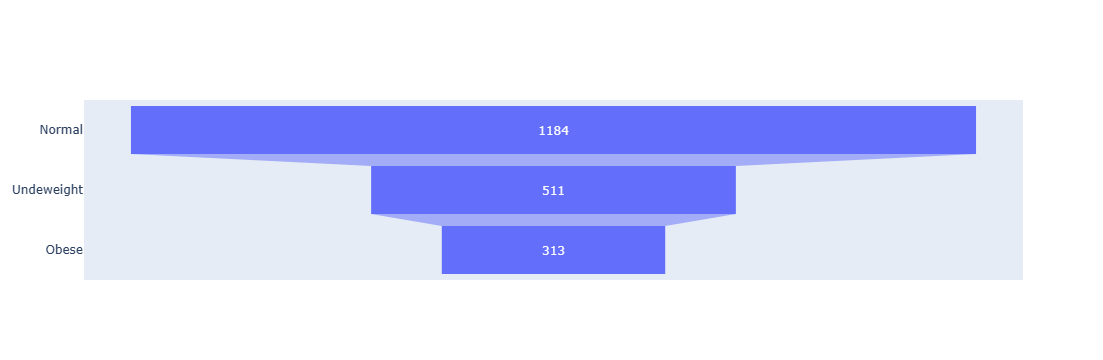

In [42]:
# BMI Category :
# BMI <18.5 THEN 'underweight range'
# BMI >= 18.5 & BMI <25 THEN 'Normal Range'
# BMI >=25 THEN 'Obese' 

# Normal BMI
nor_bim_df =  Demog[(Demog['BMI'] >= 18.5) & (Demog['BMI'] < 25)]
under_bim_df =  Demog[Demog['BMI'] < 18.5] 
obese_bim_df =  Demog[Demog['BMI'] >= 25] 
print('Funnel chart of BMI Category(Normal Weight, Underweight and Obese)')

from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = ["Normal", "Undeweight", "Obese"],
    x = [len(nor_bim_df), len(under_bim_df), len(obese_bim_df)]))

fig.show()


26. Create a column that randomly generates an age between the age group given for each patient. What was the average age of the patients?

In [22]:
# Function to generate an age between the age group given for each patient
def generate_random_age(age):
    if age == '21-29':
        return np.random.randint(21,29)
    elif age == '29-39':
        return np.random.randint(29,39)
    elif age == '39-49':
        return np.random.randint(39,49)
    elif age == '49-59':
        return np.random.randint(49,59)      
    elif age == '59-69':
        return np.random.randint(59,69)      
    elif age == '69-79':
        return np.random.randint(69,79)     
    elif age == '79-89':
        return np.random.randint(79,89)      
    elif age == '89-99':
        return np.random.randint(89,99)      
    else:
        return np.random.randint(0,20)   

# Apply the function to the ageCat column using the apply() function

updated_Demog1 = Demog
updated_Demog1['Age'] = Demog['ageCat'].apply(generate_random_age)
updated_Demog1.head(5)

# Find the Average Age of Patients

patients_avg_Age = updated_Demog1['Age'].mean()
print('Average Age of the patients : ' + str( round(patients_avg_Age, 2) ))


Average Age of the patients : 69.4


27. Using the age column generated in Q.26, calculate year of birth for each patient

In [23]:
# importing date class from datetime module 
from datetime import date 
  
# creating the date object of today's date 
todays_date = date.today() 

# Function to calculate year of birth for each patient
def birth_year(age):
    return todays_date.year - age

updated_Demog2 = updated_Demog1
updated_Demog2['Birth Year'] = updated_Demog1['Age'].apply(birth_year)
updated_Demog2


,inpatient_number,gender,weight,height,BMI,occupation,ageCat,Age,Birth Year
0,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79,73,1951
1,743087,Female,51.0,1.63,19.195303,UrbanResident,69-79,70,1954
2,866418,Male,70.0,1.70,24.221453,farmer,59-69,68,1956
3,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79,76,1948
4,810128,Female,76.0,1.55,31.633715,UrbanResident,69-79,69,1955
...,...,...,...,...,...,...,...,...,...
2003,740689,Female,35.0,1.50,15.555556,Others,79-89,84,1940
2004,734280,Female,50.0,1.55,20.811655,UrbanResident,79-89,86,1938
2005,781004,Male,75.0,1.70,25.951557,UrbanResident,39-49,41,1983
2006,744870,Male,40.0,1.50,17.777778,UrbanResident,49-59,57,1967


44. Based on Q26 and 27 display all demographic details of patients who are born in year 1945

In [24]:
# Filtering on Birth Year column
updated_Demog2.loc[updated_Demog2['Birth Year']== 1945]

,inpatient_number,gender,weight,height,BMI,occupation,ageCat,Age,Birth Year
6,844094,Male,60.0,1.65,22.038567,UrbanResident,79-89,79,1945
14,780534,Female,50.0,1.50,22.222222,UrbanResident,79-89,79,1945
40,760822,Female,43.0,1.48,19.631118,UrbanResident,79-89,79,1945
52,763014,Male,45.0,1.60,17.578125,UrbanResident,79-89,79,1945
63,859541,Female,42.0,1.48,19.174580,UrbanResident,79-89,79,1945
...,...,...,...,...,...,...,...,...,...
1913,827137,Female,35.0,1.45,16.646849,UrbanResident,79-89,79,1945
1947,782956,Male,80.0,1.75,26.122449,UrbanResident,79-89,79,1945
1961,799600,Male,50.0,1.58,20.028842,UrbanResident,79-89,79,1945
1983,852097,Female,47.0,1.53,20.077748,UrbanResident,79-89,79,1945


80. Delete the column age from Q26 iteratively.

In [21]:
# Deleting the column 'Age' that was created in Q-26 to find Average Age of Patients.

del_df = pd.DataFrame(updated_Demog1)
# Columns to delete 
columns_to_delete = ['Age']
# Iteratively delete columns
for col in columns_to_delete:
    if col in del_df:
        del del_df[col]
#updated dataframe after deleting 'Age' that was created in Q-26
print('Updated dataframe after deleting Age Column that was created in Q-26 to find Average Age of Patients.')
del_df

Updated dataframe after deleting Age Column that was created in Q-26 to find Average Age of Patients.


,inpatient_number,gender,weight,height,BMI,occupation,ageCat
0,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79
1,743087,Female,51.0,1.63,19.195303,UrbanResident,69-79
2,866418,Male,70.0,1.70,24.221453,farmer,59-69
3,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79
4,810128,Female,76.0,1.55,31.633715,UrbanResident,69-79
...,...,...,...,...,...,...,...
2003,740689,Female,35.0,1.50,15.555556,Others,79-89
2004,734280,Female,50.0,1.55,20.811655,UrbanResident,79-89
2005,781004,Male,75.0,1.70,25.951557,UrbanResident,39-49
2006,744870,Male,40.0,1.50,17.777778,UrbanResident,49-59


14. Find the list of patients whose DischargeDay is greater than the value given by the user

In [109]:
user_input_val = input("Please enter required Discharge Day : ")

discharge_days_filtered = (HosDis.loc[:, ['inpatient_number','dischargeDay']])

print('Patients whose DischargeDay is greater than the value given by the user: ')
discharge_days_filtered.loc[(HosDis['dischargeDay'] > int(user_input_val))]


Please enter required Discharge Day :  25


Patients whose DischargeDay is greater than the value given by the user: 


,inpatient_number,dischargeDay
7,787530,27
63,859541,30
89,773090,26
108,796520,50
152,791071,30
...,...,...
1944,784421,27
1945,842942,32
1987,759370,28
1997,750447,29


39. Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach

C:\Users\dipti\AppData\Local\Temp\ipykernel_56788\3895050404.py:19: RuntimeWarning: divide by zero encountered in log
  ax.plot(x, np.log(np.arange(100)), 'g')   #np.log(np.arange(100))


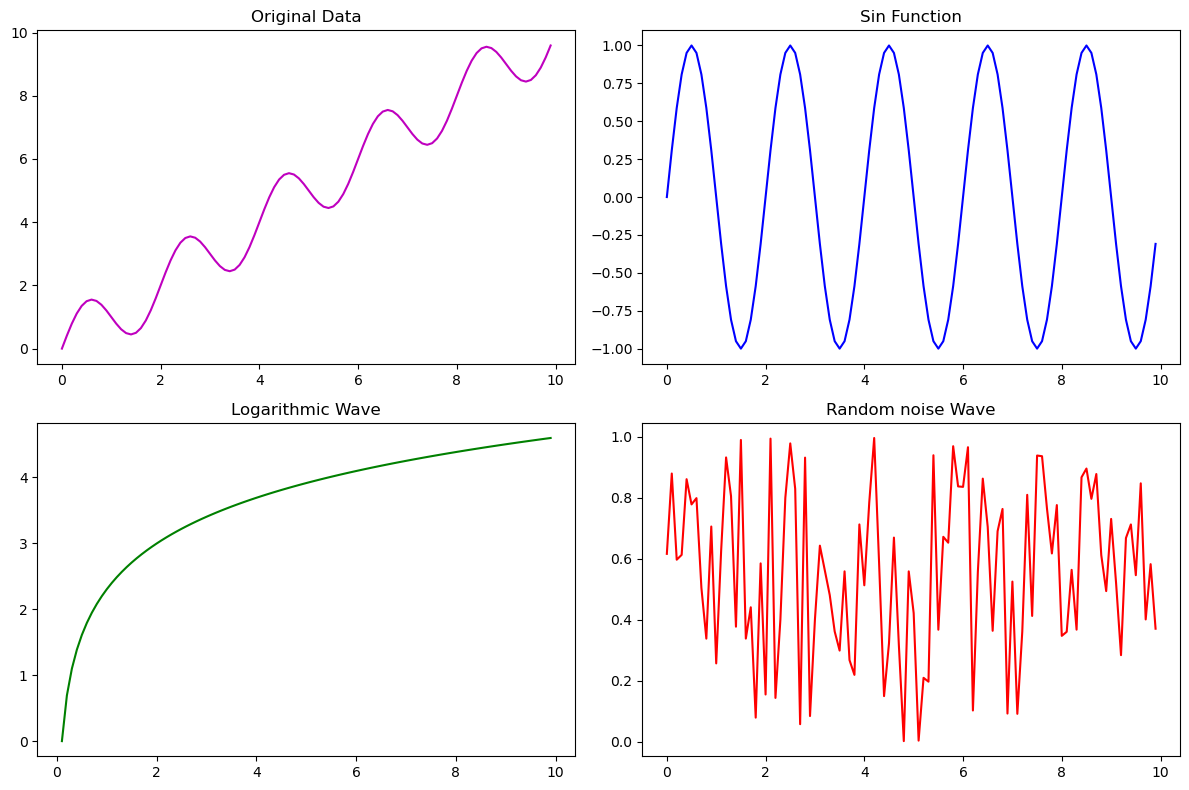

In [20]:
# create x and y  data
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x

# figure and axes objects
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# subplot
for i in range(2):
    for j in range(2):
        ax = axs[i, j]
        if i == 0 and j == 0:
            ax.plot(x, y, 'm') 
            ax.set_title('Original Data')
        elif i == 0 and j == 1:
            ax.plot(x, np.sin(np.pi * x), 'b')  
            ax.set_title('Sin Function')
        elif i == 1 and j == 0:
            ax.plot(x, np.log(np.arange(100)), 'g')   #np.log(np.arange(100)) 
            ax.set_title('Logarithmic Wave')
        elif i == 1 and j == 1:
            ax.plot(x, np.random.random(100), 'r') 
            ax.set_title('Random noise Wave')

plt.tight_layout()
plt.show()

37. Using dischargeDay values print even if it even number and odd if it odd number

In [128]:
# Function to find Even/Odd number
def find_even_odd(day):
    if day % 2 == 0:
        return 'Even'
    else:
        return 'Odd'

# Adding the column 'Even-Odd' to updated DF and calling the 'find_even_odd' function
discharge_days_even_odd = (HosDis.loc[:, ['inpatient_number','dischargeDay']])
discharge_days_even_odd['Even-Odd'] = discharge_days_even_odd['dischargeDay'].apply(find_even_odd)

discharge_days_even_odd


,inpatient_number,dischargeDay,Even-Odd
0,857781,11,Odd
1,743087,8,Even
2,866418,5,Odd
3,775928,11,Odd
4,810128,5,Odd
...,...,...,...
2003,740689,5,Odd
2004,734280,8,Even
2005,781004,14,Even
2006,744870,1,Odd


19. Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method

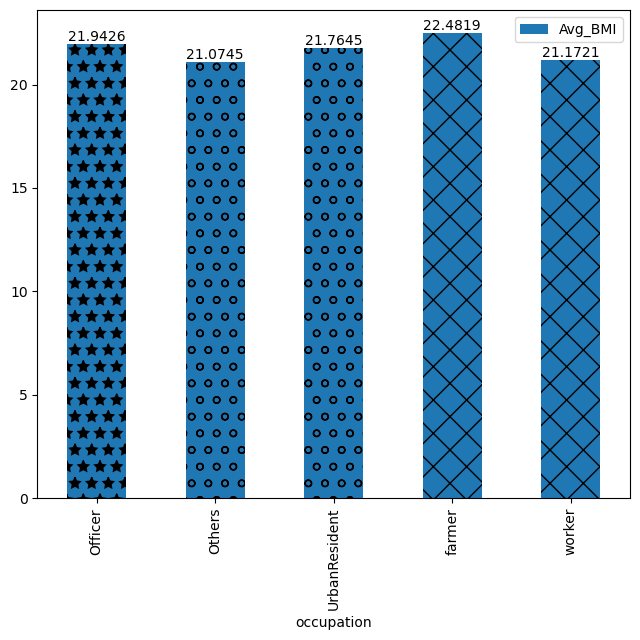

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Average BMI of each Occupation
avg_bmi_occ_df = Demog.groupby('occupation')['BMI'].agg(['mean'])

avg_bmi_occ_df.rename(columns={'mean':'Avg_BMI'},inplace= True) 

from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [6.50, 6.50]
plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame(data = avg_bmi_occ_df)
ax = plt.figure().add_subplot(111)

bars = df.plot(ax=ax, kind='bar')
ax.bar_label(ax.containers[0])
hatches = ["*", "/", "o", "x"]
for patch in bars.patches:
   patch.set_hatch(hatches[np.random.randint(10)%len(hatches)])

plt.show()


24	What columns indicate a prescence of anemia? Create a severity score for anemia and prove or disprove a correlation to Length of stay																						

columns indicate a prescence of anemia:
hemoglobin
hematocrit
red_blood_cell
mean_corpuscular_volume

As seen in the co-relation graph, Anemia Scocre and Lenght of Stay are Co-Related


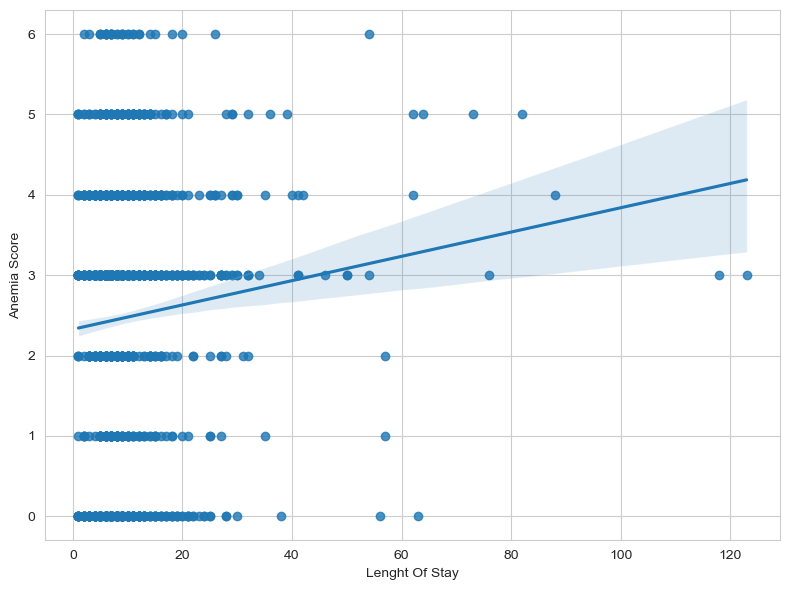

For Hemoglobin score calculation: Normal mean value of Hgb is taken (Male and Female)


In [32]:
# Anemia Score: Hemoglobin < 14 g/dL (130 g/L), hematocrit < 42% (< 0.40), or RBC < 4.2 million/mcL (< 4.5 × 10 12/L)

# Functions to calculate Anemia scoce based on olumns indicate a prescence of anemia

anemia_indicators = Labs[['inpatient_number','hemoglobin', 'hematocrit', 'red_blood_cell', 'mean_corpuscular_volume']].copy()
#echo_df.info()
def score_hemoglobin(hgb):
    if hgb >=130:
        return 0
    elif (hgb>=100) & (hgb <130):
        return 1
    elif (hgb>=80) & (hgb <100):
        return 2
    elif (hgb>=65) & (hgb <80):
        return 3
    else:
        return 0
anemia_indicators['hemoglobin_score'] = anemia_indicators['hemoglobin'].apply(score_hemoglobin)

def score_hematocrit(x):
    if pd.isnull(x):
        return 0
    elif x > 0.40:
        return 0
    else:
        return 1
anemia_indicators['hematocrit_score'] = anemia_indicators['hematocrit'].apply(score_hematocrit)

def score_red_blood_cell(x):
    if pd.isnull(x):
        return 0
    elif x > 4.2:
        return 0
    else:
        return 1
   
anemia_indicators['red_blood_cell_score'] = anemia_indicators['red_blood_cell'].apply(score_red_blood_cell)

def score_mean_corpuscular_volume(x):
    if pd.isnull(x):
        return 0
    elif x > 80:
        return 0
    else:
        return 1
anemia_indicators['mean_corpuscular_volume_score'] = anemia_indicators['mean_corpuscular_volume'].apply(score_mean_corpuscular_volume)

anemia_indicators['total_anemia_score'] = (anemia_indicators['hemoglobin_score'] +
                          anemia_indicators['hematocrit_score'] +
                          anemia_indicators['red_blood_cell_score'] +
                          anemia_indicators['mean_corpuscular_volume_score'] )

anemia_ind_df = anemia_indicators.merge(HosDis[['inpatient_number','dischargeDay']], on ='inpatient_number')
#anemia_ind_df

final_anmemia_df = anemia_ind_df[['inpatient_number','total_anemia_score', 'dischargeDay']].copy()
#final_anmemia_df

anm_scoring_columns = ['hemoglobin', 'hematocrit', 'red_blood_cell', 'mean_corpuscular_volume']
print('columns indicate a prescence of anemia:')
print(*anm_scoring_columns, sep = "\n")
print()
print('As seen in the co-relation graph, Anemia Scocre and Lenght of Stay are Co-Related')

plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.regplot(x='dischargeDay', y='total_anemia_score', data=final_anmemia_df)
plt.xlabel("Lenght Of Stay")
plt.ylabel("Anemia Score")
plt.show()

print('For Hemoglobin score calculation: Normal mean value of Hgb is taken (Male and Female)')

46. Convert occupation into numeric by Label encoding

In [5]:
# Import label encoder 
from sklearn import preprocessing 

label_encoded_demog=Demog
label_encoder = preprocessing.LabelEncoder()
label_encoded_demog['occupation'].unique()
label_encoded_demog['occupation']= label_encoder.fit_transform(label_encoded_demog['occupation'])

label_encoded_demog

,inpatient_number,gender,weight,height,BMI,occupation,ageCat
0,857781,Male,50.0,1.64,18.590125,2,69-79
1,743087,Female,51.0,1.63,19.195303,2,69-79
2,866418,Male,70.0,1.70,24.221453,3,59-69
3,775928,Male,65.0,1.70,22.491349,2,69-79
4,810128,Female,76.0,1.55,31.633715,2,69-79
...,...,...,...,...,...,...,...
2003,740689,Female,35.0,1.50,15.555556,1,79-89
2004,734280,Female,50.0,1.55,20.811655,2,79-89
2005,781004,Male,75.0,1.70,25.951557,2,39-49
2006,744870,Male,40.0,1.50,17.777778,2,49-59


In [ ]:

45. Create a dataframe with date and time as columns, where the values are the admission time

In [10]:
# create admission_time data
admission_time_data = [
    "2023-05-09 02:30:00",
    "2022-05-23 04:15:00",
    "2021-05-12 08:00:00",
    "2023-05-06 11:45:00",
    "2022-05-18 10:30:00"
]

# Create Admission_Time dataframe
Admission_Time_df = pd.DataFrame({'Admission_Time': admission_time_data})

Admission_Time_df['Admission_Time'] = pd.to_datetime(Admission_Time_df['Admission_Time'])

# Getting and placing date and time into separate columns
Admission_Time_df['Date'] = Admission_Time_df['Admission_Time'].dt.date
Admission_Time_df['Time'] = Admission_Time_df['Admission_Time'].dt.time

# drop addmission_time column
Admission_Time_df = Admission_Time_df.drop(columns=['Admission_Time'])

print(Admission_Time_df)

         Date      Time
0  2023-05-09  02:30:00
1  2022-05-23  04:15:00
2  2021-05-12  08:00:00
3  2023-05-06  11:45:00
4  2022-05-18  10:30:00


47. Generate a 3x3 Array using Random values between 1to 9 and Fix the values and position in Next Run.

In [17]:
# Generate a 3x3 Array using Random values between 1to 9
random_array = np.random.randint(1, 10, size=(3, 3))

print("Random Array:")
print(random_array)

# Save the random array for future runs
np.save("random_array.npy", random_array)

Random Array:
[[8 6 6]
 [4 9 9]
 [7 9 9]]


In [16]:
# Fix the values and position of 3x3 Array 'random_array' in Next Run
random_array = np.load("random_array.npy")
print(random_array)

[[2 5 8]
 [4 3 8]
 [1 6 4]]


31. Group the days to re-admission into bins and count how many patients were in each bin

In [14]:
hos_dc2 = HosDis.copy()
readmission_days=0
readmission_days_list = []
for reb in hos_dc2.index:
        if hos_dc2['readmission_time_days_from_admission'][reb] != "NA":
          readmission_days_list.insert(readmission_days,hos_dc2['readmission_time_days_from_admission'][reb])
          readmission_days = readmission_days + 1
readmission_days_bins = [0, 100, 200, 300, 400, 500, 10000 ]
readmission_day_groups = pd.cut(readmission_days_list, bins=readmission_days_bins, labels=["Under 100", "100-199", "200-299", "300-399","400-499", "Over 500" ])
result_bin_df = pd.DataFrame({"Readmission Days": readmission_days_list, "Readmission Day Groups": readmission_day_groups})
result_bin_df['Pt_Count'] = 1
#print(result_bin_df)

count_in_each_bin = result_bin_df.groupby('Readmission Day Groups',observed=False)['Pt_Count'].count().reset_index()

print('Count of Patients in Days to re-admission into bins: ')
count_in_each_bin

Count of Patients in Days to re-admission into bins: 


,Readmission Day Groups,Pt_Count
0,Under 100,531
1,100-199,199
2,200-299,92
3,300-399,43
4,400-499,15
5,Over 500,21


Extra Questions:

1. Finding the Count of Patients in each Age Category.

Number of Patients in each Age Category:


[Text(0, 0, '715'),
 Text(0, 0, '368'),
 Text(0, 0, '646'),
 Text(0, 0, '106'),
 Text(0, 0, '101'),
 Text(0, 0, '12'),
 Text(0, 0, '56'),
 Text(0, 0, '4')]

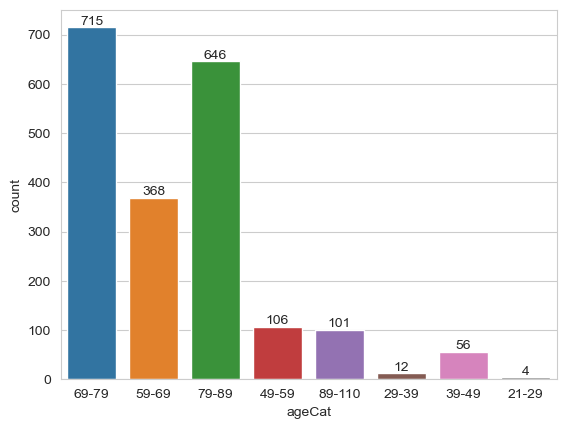

In [28]:
# Bar Plot 

# We can now automatically annotate bar plots with the built-in Axes.bar_label.
# access/extract the seaborn plot's Axes

print('Number of Patients in each Age Category:')
ax = sns.countplot(x='ageCat', data=Demog)
ax.bar_label(ax.containers[0])

2. SBP and platelets realtion Heart Health (Maycardial Infarction)

In [ ]:
mayo_card_pt = CardiacComp[CardiacComp['myocardial_infarction']== 1]

mayo_card_pt_boimarker_df = mayo_card_pt.merge(Labs[['inpatient_number','platelet', 'systolic_blood_pressure']], on ='inpatient_number')
mayo_card_pt_boimarker_df_filt = mayo_card_pt_boimarker_df

mayo_card_pt_boimarker_df_filt = (mayo_card_pt_boimarker_df_filt.loc[:, ['inpatient_number','platelet', 'systolic_blood_pressure']])

plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.regplot(x='platelet', y='systolic_blood_pressure', data=mayo_card_pt_boimarker_df_filt)
plt.xlabel("Plateletes")
plt.ylabel("Systolic Blood Pressure (SBP)")

# Show line for Normal Platelets level . less than 150 is a condition Thrombocytopenia. 
plt.axvline(x=150 , color = 'g',
  linestyle = '--', 
  linewidth = 1)
# Show line for Normal SBP level . Greater than 120 is At Risk (prehypertension)
plt.axhline(y=120 , color = 'g',
  linestyle = '--', 
  linewidth = 1)

plt.show()

print('Platelets level: Less than 150 is a condition Thrombocytopenia')
print('SBP level :  Greater than 120 is At Risk Hypertension')
print()
print('ANALYSIS:')
print()
print('After analysing the data, it shows that large percentage patients with Mayocardial Infarction have high SBP >150.')
print('From the chart it can be seen that large volume of patients having Mayocardial Infarction have Low Platelets Count < 150.')
print('SBP is slighlty realted to Platelet counts. Monitoring Platelet counts and SPB can be crutial in preventing Heart Health. ')


Realtion of BMI and AGE category to patients with Mayocardial Infarction.

C:\Users\dipti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dipti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


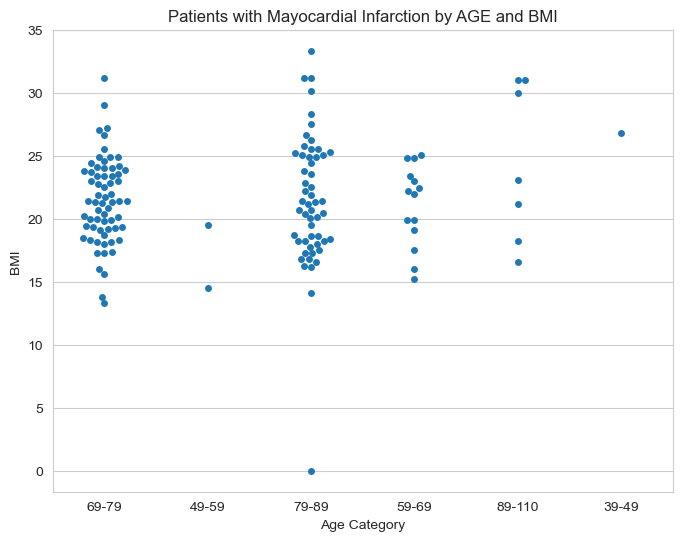

ANALYSIS:

After analysing the data, it shows that large percentage patients with Mayocardial Infarction have high BMI.
From the chart it can be infered that Elderly patients in the Age group of 60-90 have High BMI.
Monitoring weight that is realted to BMI of elderly patients can reduce the chances of having Mayocardial Infarction. 


In [24]:
# Finding patients with myocardial_infarction
mayo_card_pt = CardiacComp[CardiacComp['myocardial_infarction']== 1]
mayo_card_pt

# Merge with Demographic
mayo_card_pt_demog_df = mayo_card_pt.merge(Demog[['inpatient_number','BMI','ageCat']], on ='inpatient_number')
mayo_card_pt_demog_df_filt = mayo_card_pt_demog_df

mayo_card_pt_demog_df_filt = (mayo_card_pt_demog_df_filt.loc[:, ['inpatient_number','BMI', 'ageCat']])

# plot swarmplot using BMI and ageCat
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.swarmplot(x='ageCat', y='BMI', data=mayo_card_pt_demog_df_filt)
plt.xlabel("Age Category")
plt.ylabel("BMI")
plt.title("Patients with Mayocardial Infarction by AGE and BMI")
plt.show()

print('ANALYSIS:')
print()
print('After analysing the data, it shows that large percentage patients with Mayocardial Infarction have high BMI.')
print('From the chart it can be infered that Elderly patients in the Age group of 60-90 have High BMI.')
print('Monitoring weight that is realted to BMI of elderly patients can reduce the chances of having Mayocardial Infarction. ')


3. Congestive Heartfailure vs  bmi? correlation?

In [ ]:
cong_ht_fl_pt = CardiacComp[CardiacComp['congestive_heart_failure']== 1]
cong_ht_fl_pt

cong_ht_fl_pt_demog_df = cong_ht_fl_pt.merge(Demog[['inpatient_number','BMI']], on ='inpatient_number')
cong_ht_fl_pt_demog_df_filt = cong_ht_fl_pt_demog_df
cong_ht_fl_pt_demog_df_filt = (cong_ht_fl_pt_demog_df_filt.loc[:, ['inpatient_number','BMI', 'ageCat']])